## **Profile**
**Nama : Wildan Mujjahid Robbani** <br/>
*Mahasiswa Teknik Informatika* <br/>
*Data Science Enthusiast*
<hr/>

# **Drug Type Classification**

Proyek ini bertujuan untuk mengklasifikasikan obat ke dalam berbagai jenis berdasarkan sifat-sifat kimianya. Klasifikasi dilakukan menggunakan teknik machine learning, khususnya dengan memanfaatkan algoritma-algoritma terkini untuk menganalisis dan memprediksi jenis obat.

## Data Understanding

## Daftar Pustaka Yang di butuhkan

Disini saya menggunkan beberapa pustaka yang saya perlukan untuk kebutuhan analis dan prediksi saya nantinya, adapun pustaka pustaka tersebut antara lain
pandas, numpy, matplotlib, sklearn, DLL.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

## Load Data



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wildanmjjhd29/Drug-Type-Classification/main/drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
baskom = df.shape
print('Jumlah Baris : ',baskom[0])
print('Jumlah Kolom : ',baskom[1])

Jumlah Baris :  200
Jumlah Kolom :  6


Dataset yang akan di analisis memiliki 200 baris dan 6 kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Data Preparation
Sekarang saya akan melakukan preprocessing terlebih dahulu pada dataset yang akan saya gunakan, Data Preeprocessing ini meliputi Data Cleaning, Assesing Data, EDA, Visualisasi dan persiapan data untuk pemodelan.

In [ ]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Setelah di cek dataset tidak missing values artinya dataset yang saya miliki sudah bersih, selanjutnya saya akan melakukan visualisasi untuk lebih memahami sebaran dan distribusi datanya seperti apa.

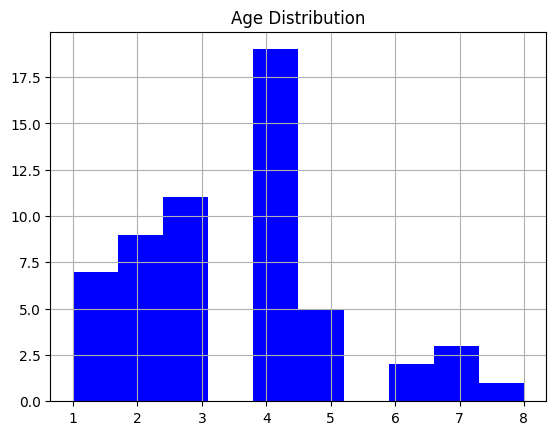

In [ ]:
age = df['Age'].value_counts()
age.hist(color='blue')
plt.title('Age Distribution')
plt.show()

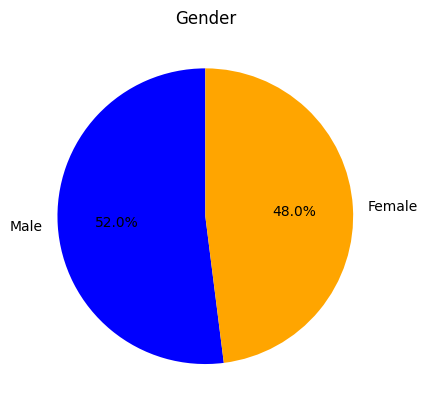

In [ ]:
color = ['blue','orange']
gender_mapping = {'M':'Male', 'F':'Female'}
gender = df['Sex'].map(gender_mapping)
gender_count = gender.value_counts()
plt.title('Gender')
plt.pie(x=gender_count.values, labels=gender_count.index, startangle=90, autopct='%1.1f%%',colors=color)
plt.show()

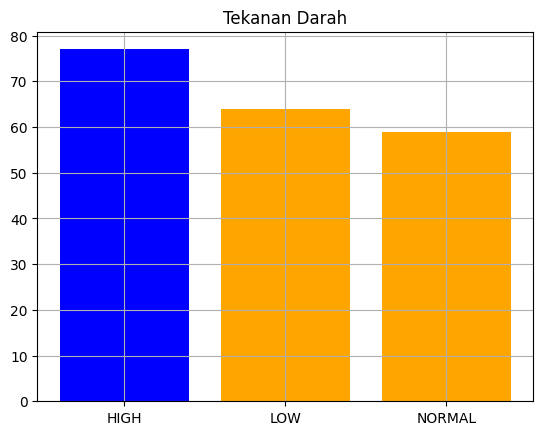

In [ ]:
color1 = ['blue','orange','orange']
bp = df['BP'].value_counts()
plt.bar(x=bp.index, height=bp.values, color = color1)
plt.title('Tekanan Darah')
plt.grid(True)
plt.show()

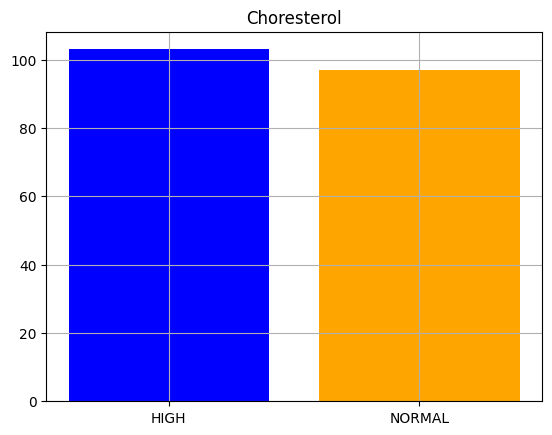

In [ ]:
color2 = ['blue','orange']
coresterol = df['Cholesterol'].value_counts()
plt.title('Choresterol')
plt.bar(x=coresterol.index, height=coresterol.values, color=color2)
plt.grid(True)
plt.show()

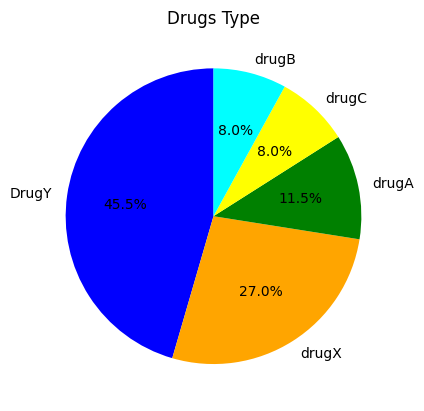

In [ ]:
color3 = ['blue','orange','green','yellow','cyan']
obat = df['Drug'].value_counts()
plt.pie(x=obat.values, labels=obat.index, startangle=90,  autopct='%1.1f%%',colors=color3)
plt.title('Drugs Type')
plt.show()

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Setelah memahami lebih lanjut data melalui visualisasi selanjutnya saya akan mempersiapkan data untuk dimodelkan, nah disini saya akan melakukan mapping pada kolom yang mempunyai nilai object atau non numeric. Ada 3 kolom yang akan saya ubah nilai nya, yaitu kolom Jenis kelamin, Tekanan Darah dan Tingkat Corestrol.

In [ ]:
mapping_gender = {'M':1,"F":0}
bp_mapping = {'LOW':1,'NORMAL':2,'HIGH':3}
ctrl_mapping = {'NORMAL':0,'HIGH':1}

df['Sex'] = df['Sex'].map(mapping_gender)
df['BP'] = df['BP'].map(bp_mapping)
df['Cholesterol'] = df['Cholesterol'].map(ctrl_mapping)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,1,25.355,DrugY
1,47,1,1,1,13.093,drugC
2,47,1,1,1,10.114,drugC
3,28,0,2,1,7.798,drugX
4,61,0,1,1,18.043,DrugY


In [ ]:
# Data Preparation
baskom = df.shape
print('Jumlah Baris Dataset : ',baskom[0])
print('Jumlah Kolom Dataset : ',baskom[1])

Jumlah Baris Dataset :  200
Jumlah Kolom Dataset :  6


Sekarang nilai pada dataset sudah menjadi numeric semuanya, nah berarti kita tinggal membagi dataset nya menjadi data latih dan data uji.
Saya akan membaginya dengan 80% data latih dan 20% data uji

In [ ]:
# Membagi dataset
x = df.drop(columns=['Drug'],axis=1)
y = df['Drug']

x adalah variabel-variabel independen atau fitur-fitur yang digunakan untuk memprediksi nilai dari variabel target. <br/>
y adalah variabel target yang ingin diprediksi atau dianalisis.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(160, 5)

In [ ]:
x_test.shape

(40, 5)

## Modeling

Saya akan membuat model klasifikasi dengan menggunakan decision tree,Dengan menggunakan decision tree, model akan mempelajari hubungan antara fitur-fitur dalam data (variabel independen) dan kelas target yang ingin diprediksi. Decision tree akan membuat keputusan berdasarkan serangkaian pertanyaan yang diajukan tentang fitur-fitur data, dan dengan demikian membagi data menjadi kelompok-kelompok yang semakin homogen dalam hal kelas target.

In [ ]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(x_train, y_train)
tree_predictions = tree.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
print("Decision Tree Accuracy : {:.2%}:".format(tree_accuracy))

Decision Tree Accuracy : 100.00%:


In [ ]:
# Membuat array untuk data test
data_test = np.array([[20,1,3,0,10.008]])
kolom = x_test.columns
data_test = pd.DataFrame(data_test,columns=kolom)
data_test

,Age,Sex,BP,Cholesterol,Na_to_K
0,20.0,1.0,3.0,0.0,10.008


In [ ]:
predict = tree.predict(data_test)
predict[0]

'drugA'